In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import norm

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

             label  features_1  features_2  features_3  features_4  \
label         1.00        0.40        0.23        0.49       -0.02   
features_1    0.40        1.00       -0.01        0.02       -0.00   
features_2    0.23       -0.01        1.00        0.05        0.01   
features_3    0.49        0.02        0.05        1.00       -0.01   
features_4   -0.02       -0.00        0.01       -0.01        1.00   
features_5    0.42       -0.03        0.04       -0.02       -0.05   
features_6    0.03       -0.02        0.00        0.05       -0.04   
features_7   -0.05       -0.03       -0.02       -0.05        0.01   
features_8    0.03       -0.04       -0.02        0.04       -0.02   
features_9    0.01        0.03       -0.02       -0.00        0.03   
features_10   0.13       -0.00        0.02       -0.01       -0.01   
features_11   0.02       -0.01       -0.01        0.02        0.00   
features_12   0.02        0.02       -0.01        0.01        0.05   
features_13   0.50  

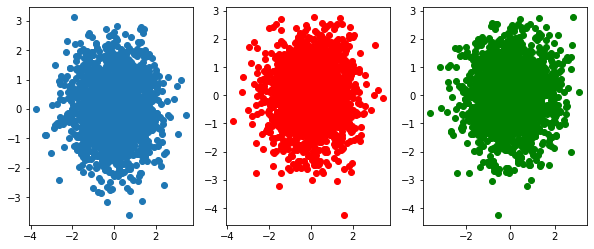

In [204]:
#1. Spotting correlations
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
#!type regression_generated.csv

data = pd.read_csv('https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
ax1.scatter(x=data['features_1'], y=data['features_2'])
ax2.scatter(x=data['features_1'], y=data['features_3'], c='r')
ax3.scatter(x=data['features_2'], y=data['features_3'], c='g')
cormat = data.corr()
print(round(cormat,2))
#both from the figures and from the correlation table it can be seen that the correlation between the features is very low, they can be considered uncorrelated
print('\033[1m'+ 'Both from the figures and from the correlation table it can be seen that the correlation between the features is very low, they can be considered uncorrelated'+"\033[0m")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

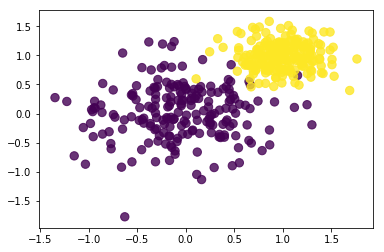

In [16]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

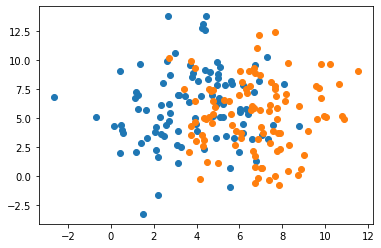

In [205]:
#2. Color-coded scatter plot
def GaussianGenerator(mean1,std1,mean2,std2):
    gauss1 = np.random.normal(loc=mean1, scale=std1, size=100)
    gauss2 = np.random.normal(loc=mean2, scale=std2, size=100)
    plt.scatter(x=gauss1, y=gauss2, cmap='RdYlGn')

GaussianGenerator(4,2,6,3)
GaussianGenerator(7,2,5,3)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

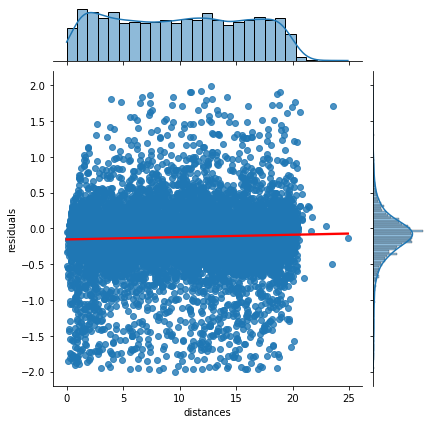

In [206]:
#3. Profile plot

#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
pckl = pd.read_pickle('data/residuals_261.pkl')
data1 = pd.DataFrame(pckl.tolist(), columns=['residuals','distances'])
data1 = data1[data1.residuals.abs()<2]
sns.jointplot(x='distances', y='residuals', data=data1, kind="reg",line_kws={"color": "red"})
#print(data1)
#plt.show()

Text(0.5, 1.0, 'Distances Histogram')

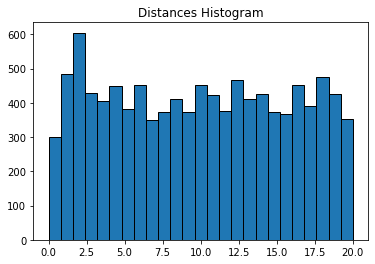

In [207]:
h, bins, _ = plt.hist(data1['distances'], bins=25, range=(0, +20), edgecolor='black')
plt.title('Distances Histogram')

(array([ 1., 12.,  7.,  1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.24725253, -0.18124156, -0.11523059, -0.04921963,  0.01679134,
         0.08280231,  0.14881327,  0.21482424,  0.28083521,  0.34684618,
         0.41285714]),
 <BarContainer object of 10 artists>)

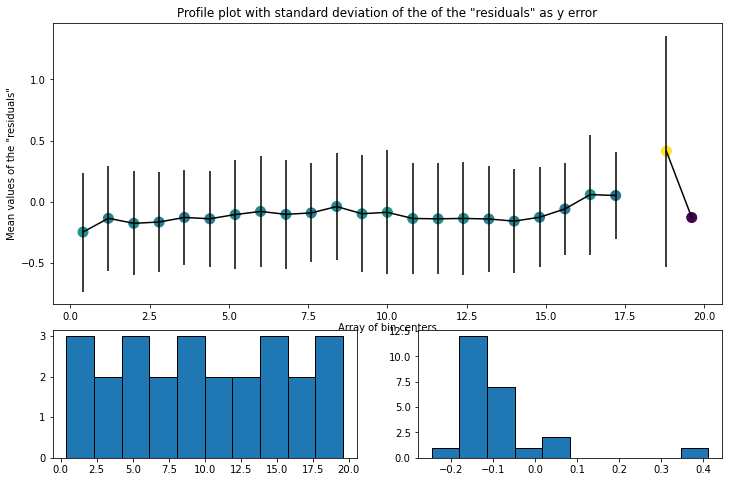

In [208]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))


x = np.array((bins[:-1] + bins[1:]) / 2)
y = scipy.stats.binned_statistic(data1['distances'], values=data1['residuals'], statistic='mean', bins=25)[0]
err_y = scipy.stats.binned_statistic(data1['distances'], values=data1['residuals'], statistic='std', bins=25)[0]

ax1.scatter(x=x, y=y, c=err_y,s=100)
ax1.set_xlabel('Array of bin centers',labelpad=1)
ax1.set_ylabel('Mean values of the "residuals"')
ax1.set_title('Profile plot with standard deviation of the of the "residuals" as y error')
ax1.errorbar(x=x, y=y, yerr=err_y, fmt="k")

ax2.hist(x,edgecolor='black')
ax3.hist(y,edgecolor='black')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


0.0
77.32423698247284
a


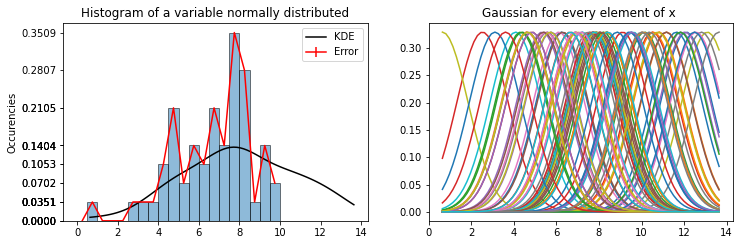

In [211]:
gridsize = (2, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))

x = np.random.normal(loc=8, scale=3, size=80)
h, bins, patches = ax1.hist(x, bins=20, range=(0, +10), density=True, cumulative=False,edgecolor='black',alpha=0.5)
ax1.set_ylabel('Occurencies')
ax1.set_title('Histogram of a variable normally distributed')
ax1.set_yticks(h)
yerror = np.sqrt(bins[0])
print(yerror)
error = np.array((bins[:-1] + bins[1:]) / 2)
ax1.errorbar(error,h, yerr=yerror, color='red',label='Error')


std = 1.06*x.std() * x.size**(-1/5)
gaussians=[]
space = np.linspace(np.min(x), np.max(x), 80)
for i in x:
    norm = scipy.stats.norm(i, std)
    gaussians.append(norm.pdf(space))
    ax2.plot(space, gaussians[-1])
ax2.set_title("Gaussian for every element of x ")

area = scipy.integrate.trapz(np.sum(gaussians, axis=0), space)
norm = np.sum(gaussians, axis=0)/area
ax1.plot(space, norm, color="black", label="KDE")
ax1.legend()